## The dataset companydata.csv contains information about 350+ companies from S&P 500. The objective is to cluster these companies into 10 baskets based on certain characteristics.

### Importing libraries

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as kmeans
import numpy as np

### Reading file through the Pandas package

In [43]:
import pandas as pd
def readFileThroughPandas(filename):
    df = pd.read_csv(filename)

    #Select the tickers column
    tick = df["companyTickers"]
    #Select all columns except tickers
    arr = df[["forward pe", "price to book","forward eps","beta","quick ratio","debt to equity"]]
    
    arr=(arr-arr.mean())/arr.std()
    
    return(tick, arr)

### Read the CSV file using one of the above functions and plot the data

In [49]:
tick, arr = readFileThroughPandas("companydata.csv")

#Now arr contains the data as a list two stacked columns of X and Y coordinates
#print(arr)

#Let us look at the data that has been copied
#Note that the tickers are stored in tick
arr

#Note that the data has been scaled

,forward pe,price to book,forward eps,beta,quick ratio,debt to equity
0,-0.572553,0.147208,0.334167,-0.247106,-0.316497,0.242670
1,0.848439,0.721056,0.453314,0.384701,-0.014809,-1.004533
2,0.281598,-0.307511,-0.656854,-1.212885,3.438432,-0.954181
3,0.855275,1.625037,1.023816,0.126901,-0.198445,-0.804067
4,0.160329,-0.434100,-0.508271,2.036970,0.585945,-1.141764
...,...,...,...,...,...,...
363,0.536372,-0.478189,-0.752171,-1.573904,-0.675026,0.619984
364,1.179054,-0.003536,-0.753573,0.035108,-0.045415,-0.288960
365,-0.008499,0.308332,1.564883,1.287778,-0.473026,-0.739763
366,-0.320275,-0.605913,-0.197087,0.272401,-0.453787,-0.576811


### Plot any two columns of the dataset

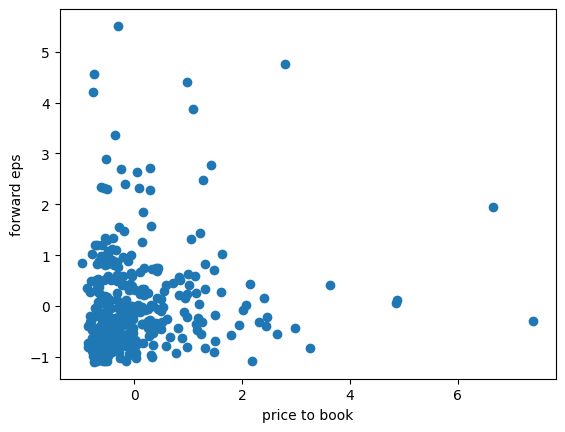

In [50]:
i=1
j=2
plt.scatter(arr.iloc[:,i],arr.iloc[:,j])
plt.xlabel(arr.columns[i])
plt.ylabel(arr.columns[j])
plt.show()

### Perform clustering

In [51]:
#Let us create 10 clusters from 2 columns
kmeans_model = kmeans(n_clusters=5)
#Use the following columns for clustering
#cols = [1,2]
#Uncomment the following to use all the columns for clustering
cols = [0,1,2,3,4,5]

kmeans_model.fit(arr.iloc[:,cols])

#Each point gets a label based on the cluster to which it belongs to
lab = kmeans_model.labels_

#Each clustrer has a centroid
centroid = kmeans_model.cluster_centers_

#Total within-cluster sum of squares (wss)
inertia = kmeans_model.inertia_

### Plotting the four clusters in different colours

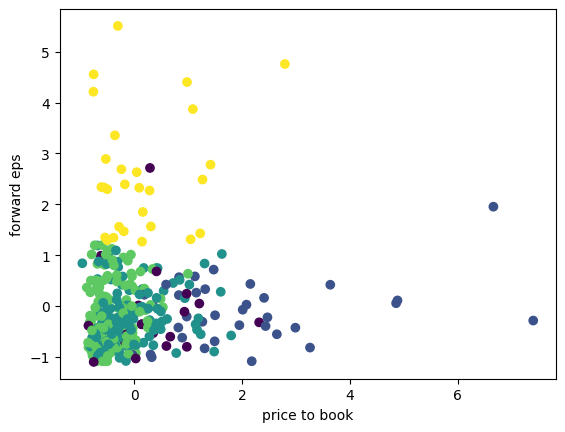

In [52]:
# Plot in single line
i=1
j=2
plt.scatter(arr.iloc[:,i],arr.iloc[:,j], c=lab)
plt.xlabel(arr.columns[i])
plt.ylabel(arr.columns[j])
plt.show()

## Storing the information in a file

In [53]:
diction = {
    "Tickers": tick,
    "Labels": lab
}

df = pd.DataFrame(data=diction)
df.to_csv('output.csv')
#df.to_excel('output.xlsx')